# PHBS_MLF_2023 Homework 2 - PCA/Hyperparameter/CV

In this homework, I will work on the [Give Me Some Credit](https://www.kaggle.com/competitions/GiveMeSomeCredit/data?select=cs-test.csv) dataset from Kaggle.

## Data Preparation

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import scipy.stats as st

In [3]:
train_df = pd.read_csv("../data/cs-training.csv").iloc[:, 1:]

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [5]:
train_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## Model Building

### Logistic Regression

In [6]:
X = train_df.iloc[:, 1:].values
y = train_df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
pipeline_lr = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                        ('scaler', StandardScaler()),
                        ('pca', PCA()),
                        ('lr', LogisticRegression(penalty='l2', C=1.0, random_state=42))])

In [8]:
param_grid_lr = {'pca__n_components': [0.8, 0.85, 0.9, 0.95, 0.99],
                 'lr__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                 'lr__penalty': ['l1', 'l2', 'elasticnet']}

gs_lr = GridSearchCV(estimator=pipeline_lr,
                     param_grid=param_grid_lr,
                     scoring='recall',
                     cv=10,
                     refit=True,
                     n_jobs=-1,
                     verbose=3)

In [9]:
gs_lr = gs_lr.fit(X_train, y_train)

Fitting 10 folds for each of 105 candidates, totalling 1050 fits
[CV 7/10] END lr__C=0.001, lr__penalty=l1, pca__n_components=0.8;, score=nan total time=   0.3s
[CV 1/10] END lr__C=0.001, lr__penalty=l1, pca__n_components=0.8;, score=nan total time=   0.3s
[CV 4/10] END lr__C=0.001, lr__penalty=l1, pca__n_components=0.8;, score=nan total time=   0.3s
[CV 6/10] END lr__C=0.001, lr__penalty=l1, pca__n_components=0.8;, score=nan total time=   0.3s
[CV 5/10] END lr__C=0.001, lr__penalty=l1, pca__n_components=0.8;, score=nan total time=   0.3s
[CV 2/10] END lr__C=0.001, lr__penalty=l1, pca__n_components=0.8;, score=nan total time=   0.3s
[CV 8/10] END lr__C=0.001, lr__penalty=l1, pca__n_components=0.8;, score=nan total time=   0.3s
[CV 3/10] END lr__C=0.001, lr__penalty=l1, pca__n_components=0.8;, score=nan total time=   0.4s
[CV 9/10] END lr__C=0.001, lr__penalty=l1, pca__n_components=0.8;, score=nan total time=   0.1s
[CV 1/10] END lr__C=0.001, lr__penalty=l1, pca__n_components=0.85;, sco

In [10]:
print(gs_lr.best_score_)
print(gs_lr.best_params_)

0.014106221880829583
{'lr__C': 0.001, 'lr__penalty': 'l2', 'pca__n_components': 0.8}


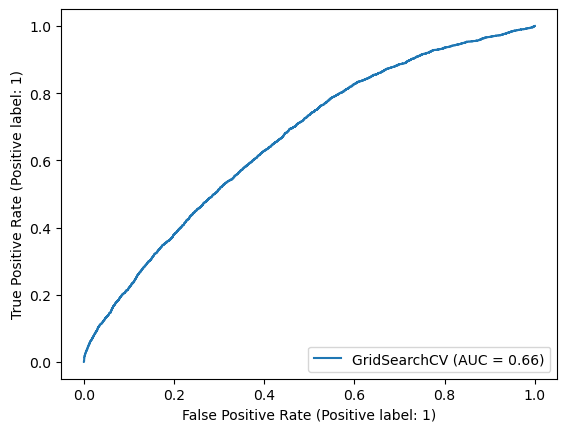

In [22]:
metrics.RocCurveDisplay.from_estimator(gs_lr, X_test, y_test)

### SVM

In [11]:
pipeline_svm = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                         ('scaler', StandardScaler()),
                         ('pca', PCA()),
                         ('svm', SVC(max_iter=50000, random_state=42, class_weight='balanced'))])

In [ ]:
gamma_range = st.loguniform(1e-1, 1e1)
C_range = st.loguniform(1e-2, 1e2)

param_grid_svm = [{'pca__n_components': [0.8, 0.85, 0.9, 0.95, 0.99],
                   'svm__C': C_range,
                   'svm__kernel': ['rbf'],
                   'svm__gamma': ['scale']},
                  {'pca__n_components': [0.8, 0.85, 0.9, 0.95, 0.99],
                   'svm__C': C_range,
                   'svm__kernel': ['rbf'],
                   'svm__gamma': gamma_range},
                  {'pca__n_components': [0.8, 0.85, 0.9, 0.95, 0.99],
                   'svm__C': C_range,
                   'svm__kernel': ['linear']}]

rs_svm = RandomizedSearchCV(estimator=pipeline_svm,
                            param_distributions=param_grid_svm,
                            scoring='f1',
                            cv=5,
                            refit=True,
                            n_jobs=-1,
                            verbose=3,
                            n_iter=40)

In [ ]:
rs_svm = rs_svm.fit(X_train, y_train)

In [ ]:
print(rs_svm.best_score_)
print(rs_svm.best_params_)

In [ ]:
metrics.RocCurveDisplay.from_estimator(rs_svm, X_test, y_test)

### Random Forest

In [12]:
pipeline_rf = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                        ('scaler', StandardScaler()),
                        ('pca', PCA()),
                        ('rf', RandomForestClassifier(criterion='gini', random_state=42, class_weight='balanced', n_jobs=-1))])

In [20]:
param_grid_rf = {'pca__n_components': [0.8, 0.85, 0.9, 0.95, 0.99],
                 'rf__n_estimators': [10, 50, 100, 200, 500],
                 'rf__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None]}

rs_rf = RandomizedSearchCV(estimator=pipeline_rf,
                           param_distributions=param_grid_rf,
                           scoring='f1',
                           cv=5,
                           refit=True,
                           n_jobs=-1,
                           verbose=3,
                           n_iter=50)

In [21]:
rs_rf = rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 2/5] END pca__n_components=0.99, rf__max_depth=9, rf__n_estimators=50;, score=0.358 total time=   6.8s
[CV 1/5] END pca__n_components=0.99, rf__max_depth=9, rf__n_estimators=50;, score=0.369 total time=   7.0s
[CV 4/5] END pca__n_components=0.99, rf__max_depth=9, rf__n_estimators=50;, score=0.370 total time=   6.9s
[CV 5/5] END pca__n_components=0.99, rf__max_depth=9, rf__n_estimators=50;, score=0.363 total time=   7.0s
[CV 3/5] END pca__n_components=0.99, rf__max_depth=9, rf__n_estimators=50;, score=0.359 total time=   7.1s
[CV 2/5] END pca__n_components=0.95, rf__max_depth=4, rf__n_estimators=100;, score=0.324 total time=   7.0s
[CV 1/5] END pca__n_components=0.95, rf__max_depth=4, rf__n_estimators=100;, score=0.330 total time=   7.0s
[CV 3/5] END pca__n_components=0.95, rf__max_depth=4, rf__n_estimators=100;, score=0.330 total time=   7.1s
[CV 1/5] END pca__n_components=0.99, rf__max_depth=3, rf__n_estimators=50;, sco

In [24]:
print(rs_rf.best_score_)
print(rs_rf.best_params_)

0.3711995007774203
{'rf__n_estimators': 500, 'rf__max_depth': 10, 'pca__n_components': 0.99}


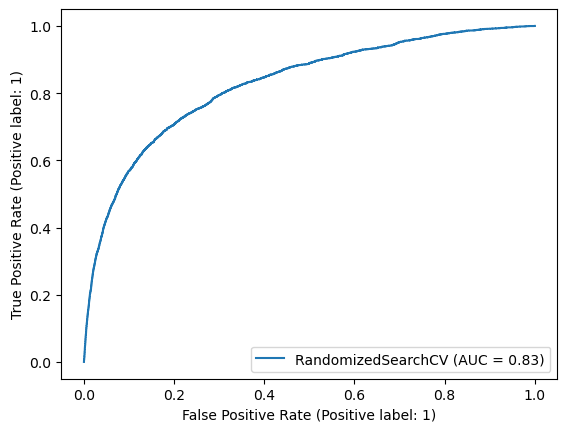

In [25]:
metrics.RocCurveDisplay.from_estimator(rs_rf, X_test, y_test)